In [1]:
# Importing required libraries

import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from Functions_and_Doctests import *


# Change directory by uncommenting and passing the appropriate directory path
# os.chdir('D:/Downloads/')

# Hypothesis 1

## A larger proportion of individuals who are arrested for the crime they commit are in the age group of 25 - 44

In [3]:
# Reading the dataset 'NYPD_Arrests_Data_2019.csv' into a dataframe

arrests_2019 = pd.read_csv('NYPD_Arrests_Data_2019.csv')

In [4]:
# Preliminary analysis for stop_question_frisk data

preliminary_analysis(arrests_2019)

*** Rows and Columns in the Dataframe ***
Number of Instances (rows) : 214617
Number of Columns :  19
*** Column Names, Non-Null Count and Column Data Types***
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214617 entries, 0 to 214616
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ARREST_KEY         214617 non-null  int64  
 1   ARREST_DATE        214617 non-null  object 
 2   PD_CD              214576 non-null  float64
 3   PD_DESC            214458 non-null  object 
 4   KY_CD              214458 non-null  float64
 5   OFNS_DESC          214458 non-null  object 
 6   LAW_CODE           214617 non-null  object 
 7   LAW_CAT_CD         213248 non-null  object 
 8   ARREST_BORO        214617 non-null  object 
 9   ARREST_PRECINCT    214617 non-null  int64  
 10  JURISDICTION_CODE  214617 non-null  int64  
 11  AGE_GROUP          214617 non-null  object 
 12  PERP_SEX           214617 non-null  ob

In [5]:
# Checking count of the age groups in the dataset
arrests_2019.AGE_GROUP.value_counts()

25-44    114190
18-24     43561
45-64     43551
<18       10277
65+        3038
Name: AGE_GROUP, dtype: int64

In [6]:
# Selecting only the AGE_GROUP column from the dataset for this hypothesis    

age_df = select_columns(arrests_2019, 'AGE_GROUP')

age_df

,AGE_GROUP
0,25-44
1,25-44
2,18-24
3,25-44
4,25-44
...,...
214612,25-44
214613,25-44
214614,45-64
214615,25-44


In [7]:
# Using the age_pct_col() function to determine what percentage of the population the age groups represent

age_group_pct = age_pct_col(age_df)

age_group_pct

,AGE_GROUP,POP_BY_AGE_PCT
0,25-44,0.272
1,25-44,0.272
2,18-24,0.065
3,25-44,0.272
4,25-44,0.272
...,...,...
214612,25-44,0.272
214613,25-44,0.272
214614,45-64,0.261
214615,25-44,0.272


In [8]:
# Using the grouping_for_count() function to create a new dataframe 'age_grouped_df' which consists of the count 
# of the age groups

age_grouped_df = grouping_for_count(age_group_pct, 'AGE_GROUP', 'POP_BY_AGE_PCT', 'AGE_GROUP')

age_grouped_df

,AGE_GROUP,POP_BY_AGE_PCT,COUNT
0,18-24,0.065,43561
1,25-44,0.272,114190
2,45-64,0.261,43551
3,65+,0.170,3038
4,<18,0.232,10277


In [9]:
# Using the normalized_values() function to generate normalized value for the age_grouped_df

normalized_values(age_grouped_df, 'COUNT', 'POP_BY_AGE_PCT')

,AGE_GROUP,POP_BY_AGE_PCT,COUNT,NORM_VALUES
0,18-24,0.065,43561,670169
1,25-44,0.272,114190,419816
2,45-64,0.261,43551,166862
3,65+,0.170,3038,17870
4,<18,0.232,10277,44297


In [10]:
# Using the proportional_values() function on age_grouped_df to determine ratios

proportional_values(age_grouped_df)

,AGE_GROUP,POP_BY_AGE_PCT,COUNT,NORM_VALUES,PROP_VALUES
0,18-24,0.065,43561,670169,50.81
1,25-44,0.272,114190,419816,31.83
2,45-64,0.261,43551,166862,12.65
3,65+,0.170,3038,17870,1.35
4,<18,0.232,10277,44297,3.36


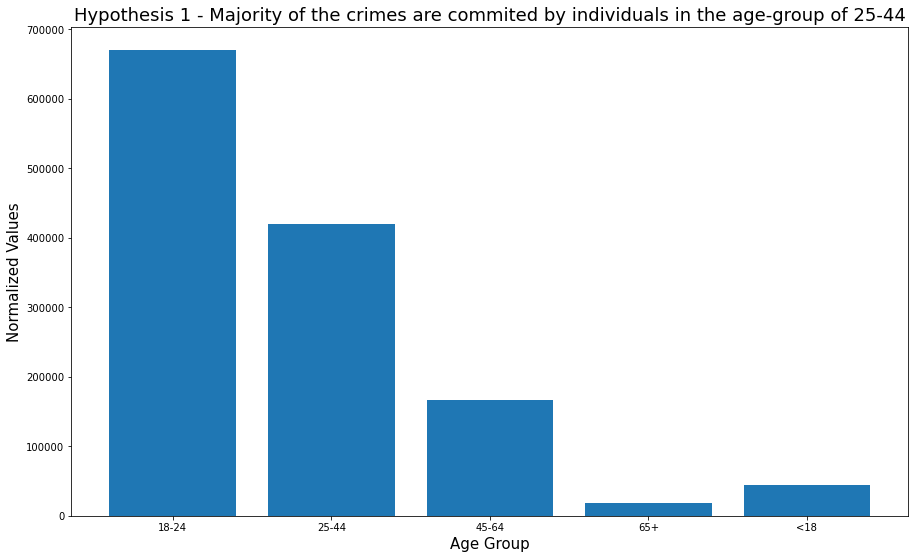

In [11]:
# Creating a plot to visualize the distribution of data (normalized values)

fig, ax = plt.subplots(1,1, figsize = (15,9))

x = age_grouped_df['AGE_GROUP']
y = age_grouped_df['NORM_VALUES']

ax.bar(x, y)
ax.set_title('Hypothesis 1 - A larger proportion of individuals who are arrested for the crime they commit are in the age group of 25 - 44', fontsize = 18)
plt.xlabel('Age Group', fontsize = 15)
plt.ylabel('Normalized Values', fontsize = 15)
plt.show()

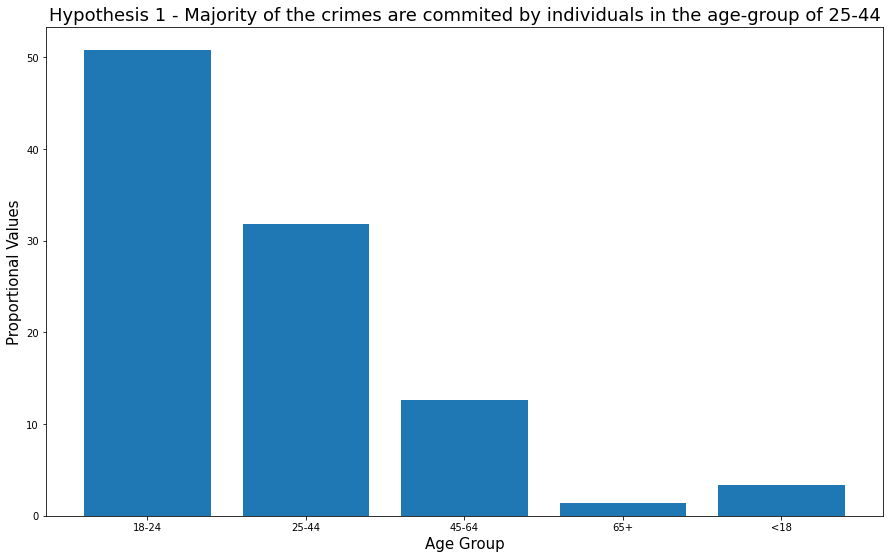

In [12]:
# Creating a plot to visualize the distribution of data by proportional analysis (proportional values)

fig, ax = plt.subplots(1,1, figsize = (15,9))

x = age_grouped_df['AGE_GROUP']
y = age_grouped_df['PROP_VALUES']

ax.bar(x, y)
ax.set_title('Hypothesis 1 - A larger proportion of individuals who are arrested for the crime they commit are in the age group of 25 - 44', fontsize = 18)
plt.xlabel('Age Group', fontsize = 15)
plt.ylabel('Proportional Values', fontsize = 15)
plt.show()

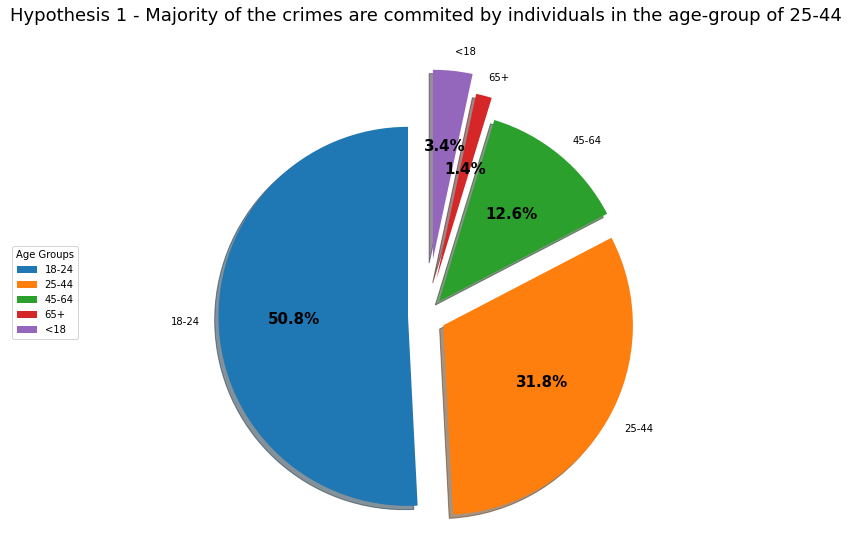

In [13]:
# A better representation of the above graph would be a pie chart. 
# Creating a pie-chart to conclude our analysis for this hypothesis. A pie-chart is a better representation for
# proportion of a whole 

labels = age_grouped_df['AGE_GROUP']
sizes = age_grouped_df['PROP_VALUES']
explode = (0.1, 0.1, 0.1, 0.2, 0.3)

fig1, ax1 = plt.subplots(figsize = (15,9))

wedges, texts, autotexts =  ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

ax1.axis('equal')

ax1.legend(wedges, labels,
          title="Age Groups",
          loc="center left")
  
plt.setp(autotexts, size = 15, weight = "bold") 
ax1.set_title("Hypothesis 1 - A larger proportion of individuals who are arrested for the crime they commit are in the age group of 25 - 44\n", fontsize = 18)

plt.show()

# Hypothesis 2
## (A) - Males are more likely to be frisked than females
## (B) - Males are more likely to be arrested than females

### Probability of being Frisked - By Sex

In [14]:
# Reading the frisking data

stop_question_frisk = pd.read_excel('sqf-2019.xlsx')

In [15]:
# Creating a copy of the data

sqf = stop_question_frisk.copy()

In [16]:
# Preliminary analysis for stop_question_frisk data

preliminary_analysis(sqf)

*** Rows and Columns in the Dataframe ***
Number of Instances (rows) : 13459
Number of Columns :  83
*** Column Names, Non-Null Count and Column Data Types***
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13459 entries, 0 to 13458
Data columns (total 83 columns):
 #   Column                                                      Non-Null Count  Dtype         
---  ------                                                      --------------  -----         
 0   STOP_ID_ANONY                                               13459 non-null  int64         
 1   STOP_FRISK_DATE                                             13459 non-null  datetime64[ns]
 2   STOP_FRISK_TIME                                             13459 non-null  object        
 3   YEAR2                                                       13459 non-null  int64         
 4   MONTH2                                                      13459 non-null  object        
 5   DAY2                                                   

In [17]:
# Identifying frisking distribution of individuals by sex

sqf.SUSPECT_SEX.value_counts()

MALE      12179
FEMALE     1230
(null)       50
Name: SUSPECT_SEX, dtype: int64

In [18]:
# Using the select_columns() function to select columns relevant for analysis for this hypothesis   

sqf_df = select_columns(sqf, 'SUSPECT_SEX', 'FRISKED_FLAG')
sqf_df

,SUSPECT_SEX,FRISKED_FLAG
0,MALE,Y
1,MALE,N
2,MALE,N
3,MALE,N
4,MALE,Y
...,...,...
13454,MALE,N
13455,MALE,Y
13456,MALE,Y
13457,MALE,N


In [19]:
# Using the sex_pct_col() function to generate the POP_BY_SEX_PCT

sqf_sex_group_pct = sex_pct_col(sqf_df, 'SUSPECT_SEX')

sqf_sex_group_pct

,SUSPECT_SEX,FRISKED_FLAG,POP_BY_SEX_PCT
0,MALE,Y,0.4767
1,MALE,N,0.4767
2,MALE,N,0.4767
3,MALE,N,0.4767
4,MALE,Y,0.4767
...,...,...,...
13454,MALE,N,0.4767
13455,MALE,Y,0.4767
13456,MALE,Y,0.4767
13457,MALE,N,0.4767


In [20]:
# Using the grouping_for_count() function to generate count values per  sex

sqf_sex_grouped_df = grouping_for_count(sqf_sex_group_pct, 'SUSPECT_SEX', 'POP_BY_SEX_PCT', 'SUSPECT_SEX')

sqf_sex_grouped_df

,SUSPECT_SEX,POP_BY_SEX_PCT,COUNT
0,FEMALE,0.5233,1230
1,MALE,0.4767,12179


In [21]:
# Using normalized_values() function to generate the NORM_VALUES column derived from COUNT and POP_BY_SEX_PCT
# This gives us the dataframe consisting of all records within the data

normalized_values(sqf_sex_grouped_df, 'COUNT', 'POP_BY_SEX_PCT')

,SUSPECT_SEX,POP_BY_SEX_PCT,COUNT,NORM_VALUES
0,FEMALE,0.5233,1230,2350
1,MALE,0.4767,12179,25548


In [22]:
# To investigate the probability of an individual from a particular sex being frisked, 
# we will now filter the data to include only records where the individual was frisked

sqf_frisked_Y = sqf_sex_group_pct[sqf_sex_group_pct['FRISKED_FLAG'] == 'Y']

sqf_frisked_Y

,SUSPECT_SEX,FRISKED_FLAG,POP_BY_SEX_PCT
0,MALE,Y,0.4767
4,MALE,Y,0.4767
5,MALE,Y,0.4767
7,MALE,Y,0.4767
9,MALE,Y,0.4767
...,...,...,...
13444,MALE,Y,0.4767
13447,MALE,Y,0.4767
13453,MALE,Y,0.4767
13455,MALE,Y,0.4767


In [23]:
# Using grouping_for_count() function to generate the number of cases where the individuals from a particular sex were frisked 

sqf_frisked_Y_grouped = grouping_for_count(sqf_frisked_Y, 'SUSPECT_SEX', 'POP_BY_SEX_PCT', 'SUSPECT_SEX')

sqf_frisked_Y_grouped

,SUSPECT_SEX,POP_BY_SEX_PCT,COUNT
0,FEMALE,0.5233,363
1,MALE,0.4767,7234


In [24]:
# Using normalized_values() function to generate the normalized values so that they are proportionate to 
# the population (of NYC)

normalized_values(sqf_frisked_Y_grouped, 'COUNT', 'POP_BY_SEX_PCT')

,SUSPECT_SEX,POP_BY_SEX_PCT,COUNT,NORM_VALUES
0,FEMALE,0.5233,363,693
1,MALE,0.4767,7234,15175


In [25]:
# Renaming NORM_VALUES in sqf_grouped to NORM_VALUES_T (Total) and COUNT to COUNT_T (TOTAL) for ease in understanding

sqf_sex_grouped_df.rename(columns={'NORM_VALUES':'NORM_VALUES_T', 'COUNT':'COUNT_T'}, inplace=True)

In [26]:
# Adding the NORM_VALUES from sqf_frisked_Y_grouped to sqf_grouped to facilitate analysis (Could have used joins)

sqf_sex_grouped_df['NORM_VALUES_FRISKED_Y'] = sqf_frisked_Y_grouped['NORM_VALUES']

In [27]:
# Calculating the probability of an individual from a particular sex being frisked if they are stopped

sqf_sex_grouped_df['PROB_FRISKED'] = (sqf_sex_grouped_df['NORM_VALUES_FRISKED_Y']/sqf_sex_grouped_df['NORM_VALUES_T']).round(2)

sqf_sex_grouped_df

,SUSPECT_SEX,POP_BY_SEX_PCT,COUNT_T,NORM_VALUES_T,NORM_VALUES_FRISKED_Y,PROB_FRISKED
0,FEMALE,0.5233,1230,2350,693,0.29
1,MALE,0.4767,12179,25548,15175,0.59


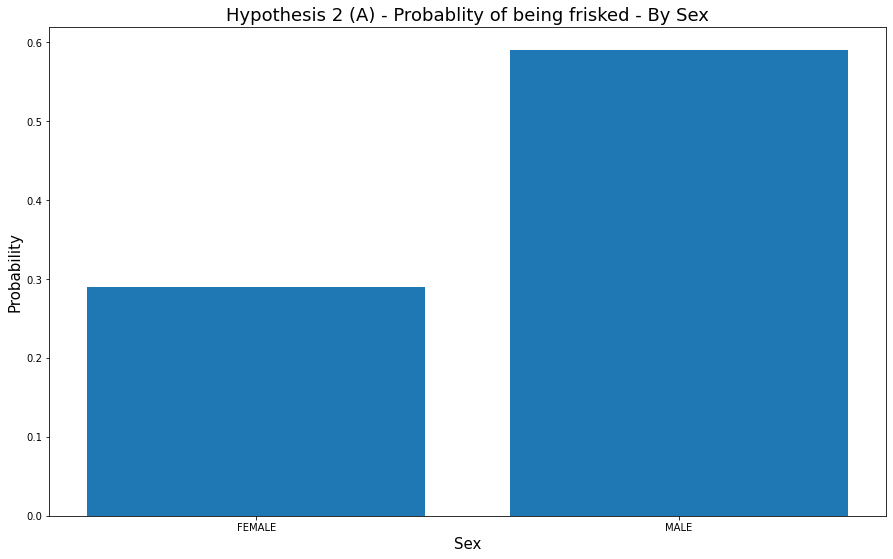

In [28]:
# Visualzing the dataframe above to allow the analysis to become more intuitive

fig, ax = plt.subplots(1,1, figsize = (15,9))

x = sqf_sex_grouped_df['SUSPECT_SEX']
y = sqf_sex_grouped_df['PROB_FRISKED']

ax.bar(x, y)
ax.set_title('Hypothesis 2 (A) - Probablity of being frisked - By Sex', fontsize = 18)
plt.xlabel('Sex', fontsize = 15)
plt.ylabel('Probability', fontsize = 15)
plt.show()

### Probability of being Arrested - By Sex

In [29]:
# Using select_columns() function to choose relevant columns for analysis

arr_df = select_columns(stop_question_frisk, 'SUSPECT_SEX', 'SUSPECT_ARRESTED_FLAG')
arr_df

,SUSPECT_SEX,SUSPECT_ARRESTED_FLAG
0,MALE,N
1,MALE,Y
2,MALE,Y
3,MALE,N
4,MALE,Y
...,...,...
13454,MALE,Y
13455,MALE,N
13456,MALE,Y
13457,MALE,Y


In [30]:
# Using sex_pct_col() function to generate population by sex percentage values 

arr_sex_group_pct = sex_pct_col(arr_df, 'SUSPECT_SEX')

arr_sex_group_pct

,SUSPECT_SEX,SUSPECT_ARRESTED_FLAG,POP_BY_SEX_PCT
0,MALE,N,0.4767
1,MALE,Y,0.4767
2,MALE,Y,0.4767
3,MALE,N,0.4767
4,MALE,Y,0.4767
...,...,...,...
13454,MALE,Y,0.4767
13455,MALE,N,0.4767
13456,MALE,Y,0.4767
13457,MALE,Y,0.4767


In [31]:
# Filtering data records to include only those records where the suspect was arrested

sqf_arrested = arr_sex_group_pct[arr_sex_group_pct['SUSPECT_ARRESTED_FLAG'] == 'Y']

sqf_arrested

,SUSPECT_SEX,SUSPECT_ARRESTED_FLAG,POP_BY_SEX_PCT
1,MALE,Y,0.4767
2,MALE,Y,0.4767
4,MALE,Y,0.4767
9,MALE,Y,0.4767
10,MALE,Y,0.4767
...,...,...,...
13453,MALE,Y,0.4767
13454,MALE,Y,0.4767
13456,MALE,Y,0.4767
13457,MALE,Y,0.4767


In [32]:
# Using grouping_for_count() function to generate the number of times individuals from a particular sex were arrested 

arr_sex_grouped_df = grouping_for_count(sqf_arrested, 'SUSPECT_SEX', 'POP_BY_SEX_PCT', 'SUSPECT_SEX')

arr_sex_grouped_df

,SUSPECT_SEX,POP_BY_SEX_PCT,COUNT
0,FEMALE,0.5233,447
1,MALE,0.4767,3848


In [33]:
# Using normalized_values() function to generate normalized values based on population statistics

normalized_values(arr_sex_grouped_df, 'COUNT', 'POP_BY_SEX_PCT')

,SUSPECT_SEX,POP_BY_SEX_PCT,COUNT,NORM_VALUES
0,FEMALE,0.5233,447,854
1,MALE,0.4767,3848,8072


In [34]:
# Adding the NORM_VALUES_T column from sqf_sex_grouped_df to facilitate further analysis

arr_sex_grouped_df['NORM_VALUES_T'] = sqf_sex_grouped_df['NORM_VALUES_T']

arr_sex_grouped_df

,SUSPECT_SEX,POP_BY_SEX_PCT,COUNT,NORM_VALUES,NORM_VALUES_T
0,FEMALE,0.5233,447,854,2350
1,MALE,0.4767,3848,8072,25548


In [35]:
# Calculating the probability of an individual from a particular sex being arrested if they are stopped

arr_sex_grouped_df['PROB_ARRESTED'] = arr_sex_grouped_df['NORM_VALUES']/arr_sex_grouped_df['NORM_VALUES_T']

arr_sex_grouped_df

,SUSPECT_SEX,POP_BY_SEX_PCT,COUNT,NORM_VALUES,NORM_VALUES_T,PROB_ARRESTED
0,FEMALE,0.5233,447,854,2350,0.363404
1,MALE,0.4767,3848,8072,25548,0.315954


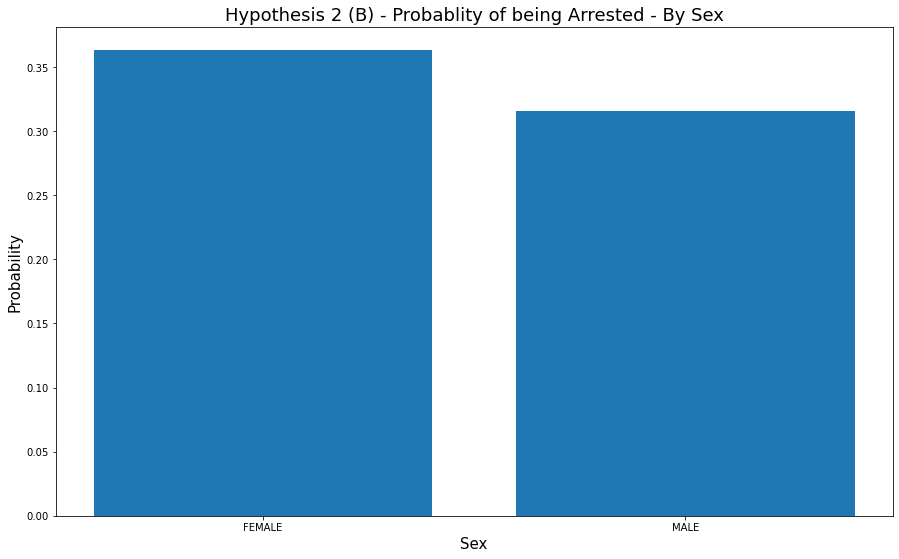

In [36]:
# Visualzing the dataframe above to allow the analysis to become more intuitive

fig, ax = plt.subplots(1,1, figsize = (15,9))

x = arr_sex_grouped_df['SUSPECT_SEX']
y = arr_sex_grouped_df['PROB_ARRESTED']

ax.bar(x, y)
ax.set_title('Hypothesis 2 (B) - Probablity of being Arrested - By Sex', fontsize = 18)
plt.xlabel('Sex', fontsize = 15)
plt.ylabel('Probability', fontsize = 15)
plt.show()

# Hypothesis 3
## (A) - Individuals of a particular race are more likely to be frisked than any other race
## (B) - Individuals of a particular race are more likely to be arrested than any other race

### Probability of Being Frisked - By Race

In [37]:
# Identifying distribution of individuals by race in the dataset

stop_question_frisk.SUSPECT_RACE_DESCRIPTION.value_counts()

BLACK                        7981
WHITE HISPANIC               2742
WHITE                        1215
BLACK HISPANIC               1127
ASIAN / PACIFIC ISLANDER      301
(null)                         85
AMERICAN INDIAN/ALASKAN N       8
Name: SUSPECT_RACE_DESCRIPTION, dtype: int64

In [38]:
# using the select_columns() function to select columns relevant for analysis for this hypothesis 

sqf = select_columns(stop_question_frisk, 'SUSPECT_RACE_DESCRIPTION', 'FRISKED_FLAG')

In [39]:
# Using race_pct_col() function to generate the POP_BY_RACE_PCT

sqf_race_pct = race_pct_col(sqf, 'SUSPECT_RACE_DESCRIPTION')

sqf_race_pct

,SUSPECT_RACE_DESCRIPTION,FRISKED_FLAG,POP_BY_RACE_PCT
0,BLACK,Y,0.2195
1,BLACK,N,0.2195
2,WHITE,N,0.3214
3,BLACK,N,0.2195
4,BLACK,Y,0.2195
...,...,...,...
13454,WHITE,N,0.3214
13455,BLACK,Y,0.2195
13456,WHITE,Y,0.3214
13457,ASIAN / PACIFIC ISLANDER,N,0.1400


In [40]:
# Using grouping_for_count() function to generate count values per race

sqf_grouped = grouping_for_count(sqf_race_pct, 'SUSPECT_RACE_DESCRIPTION', 'POP_BY_RACE_PCT', 'SUSPECT_RACE_DESCRIPTION')

sqf_grouped

,SUSPECT_RACE_DESCRIPTION,POP_BY_RACE_PCT,COUNT
0,(null),0.1862,85
1,ASIAN / PACIFIC ISLANDER,0.1400,301
2,BLACK,0.2195,7981
3,BLACK HISPANIC,0.0233,1127
4,WHITE,0.3214,1215
5,WHITE HISPANIC,0.1053,2742


In [41]:
# Using normalized_values() function to generate the NORM_VALUES column derived from COUNT and POP_BY_RACE_PCT
# This gives us the dataframe consisting of all records within the data

normalized_values(sqf_grouped, 'COUNT', 'POP_BY_RACE_PCT')

,SUSPECT_RACE_DESCRIPTION,POP_BY_RACE_PCT,COUNT,NORM_VALUES
0,(null),0.1862,85,456
1,ASIAN / PACIFIC ISLANDER,0.1400,301,2150
2,BLACK,0.2195,7981,36359
3,BLACK HISPANIC,0.0233,1127,48369
4,WHITE,0.3214,1215,3780
5,WHITE HISPANIC,0.1053,2742,26039


In [42]:
# To investigate the probability of an individual from a particular race being frisked, 
# we will now filter the data to include only records where the individual was frisked

sqf_frisked_Y = sqf_race_pct[sqf_race_pct['FRISKED_FLAG'] == 'Y']

sqf_frisked_Y

,SUSPECT_RACE_DESCRIPTION,FRISKED_FLAG,POP_BY_RACE_PCT
0,BLACK,Y,0.2195
4,BLACK,Y,0.2195
5,BLACK,Y,0.2195
7,BLACK HISPANIC,Y,0.0233
9,BLACK,Y,0.2195
...,...,...,...
13444,WHITE HISPANIC,Y,0.1053
13447,BLACK,Y,0.2195
13453,BLACK,Y,0.2195
13455,BLACK,Y,0.2195


In [43]:
# Using grouping_for_count() function to generate the number of cases where the individuals from various races were frisked 

sqf_frisked_Y_grouped = grouping_for_count(sqf_frisked_Y, 'SUSPECT_RACE_DESCRIPTION', 'POP_BY_RACE_PCT', 'SUSPECT_RACE_DESCRIPTION')

sqf_frisked_Y_grouped

,SUSPECT_RACE_DESCRIPTION,POP_BY_RACE_PCT,COUNT
0,(null),0.1862,52
1,ASIAN / PACIFIC ISLANDER,0.1400,145
2,BLACK,0.2195,4626
3,BLACK HISPANIC,0.0233,686
4,WHITE,0.3214,528
5,WHITE HISPANIC,0.1053,1584


In [44]:
# Using normalized_values() function to generate the normalized values so that they are proportionate to 
# the population (of NYC)

normalized_values(sqf_frisked_Y_grouped, 'COUNT', 'POP_BY_RACE_PCT')

,SUSPECT_RACE_DESCRIPTION,POP_BY_RACE_PCT,COUNT,NORM_VALUES
0,(null),0.1862,52,279
1,ASIAN / PACIFIC ISLANDER,0.1400,145,1035
2,BLACK,0.2195,4626,21075
3,BLACK HISPANIC,0.0233,686,29442
4,WHITE,0.3214,528,1642
5,WHITE HISPANIC,0.1053,1584,15042


In [45]:
# Renaming NORM_VALUES in sqf_grouped to NORM_VALUES_T (Total) and COUNT to COUNT_T (TOTAL) for ease in understanding

sqf_grouped.rename(columns={'NORM_VALUES':'NORM_VALUES_T', 'COUNT':'COUNT_T'}, inplace=True)

In [46]:
# Adding the NORM_VALUES from sqf_frisked_Y_grouped to sqf_grouped to facilitate analysis (Could have used joins)

sqf_grouped['NORM_VALUES_FRISKED_Y'] = sqf_frisked_Y_grouped['NORM_VALUES']

In [47]:
# Calculating the probability of an individual from a particular race being frisked if they are stopped

sqf_grouped['PROB_FRISKED'] = (sqf_grouped['NORM_VALUES_FRISKED_Y']/sqf_grouped['NORM_VALUES_T']).round(2)

sqf_grouped

,SUSPECT_RACE_DESCRIPTION,POP_BY_RACE_PCT,COUNT_T,NORM_VALUES_T,NORM_VALUES_FRISKED_Y,PROB_FRISKED
0,(null),0.1862,85,456,279,0.61
1,ASIAN / PACIFIC ISLANDER,0.1400,301,2150,1035,0.48
2,BLACK,0.2195,7981,36359,21075,0.58
3,BLACK HISPANIC,0.0233,1127,48369,29442,0.61
4,WHITE,0.3214,1215,3780,1642,0.43
5,WHITE HISPANIC,0.1053,2742,26039,15042,0.58


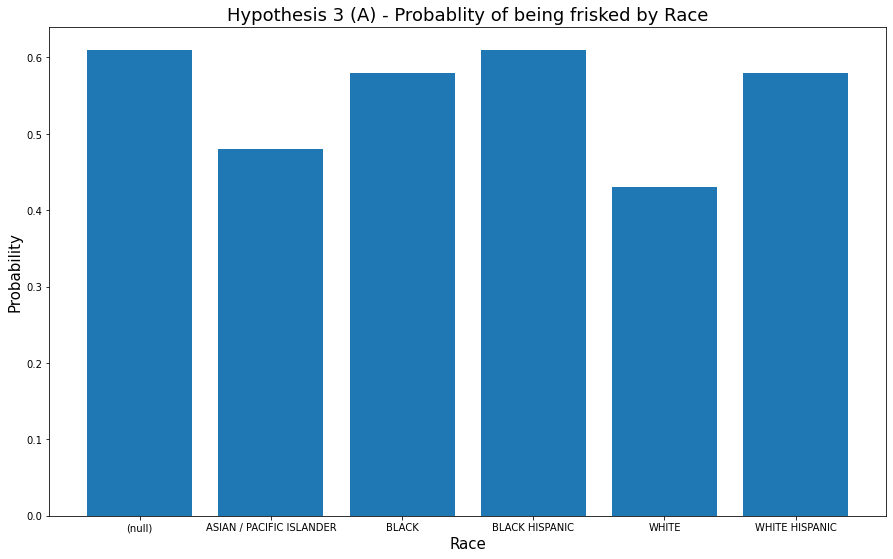

In [48]:
# Visualzing the dataframe above to allow the analysis to become more intuitive

fig, ax = plt.subplots(1,1, figsize = (15,9))

x = sqf_grouped['SUSPECT_RACE_DESCRIPTION']
y = sqf_grouped['PROB_FRISKED']

ax.bar(x, y)
ax.set_title('Hypothesis 3 (A) - Probablity of being frisked by Race', fontsize = 18)
plt.xlabel('Race', fontsize = 15)
plt.ylabel('Probability', fontsize = 15)
plt.show()

### Probability of being Arrested - By Race

In [49]:
# Using select_columns() function to choose relevant columns for analysis

sqf_arrested = select_columns(stop_question_frisk, 'SUSPECT_RACE_DESCRIPTION', 'SUSPECT_ARRESTED_FLAG')

sqf_arrested

,SUSPECT_RACE_DESCRIPTION,SUSPECT_ARRESTED_FLAG
0,BLACK,N
1,BLACK,Y
2,WHITE,Y
3,BLACK,N
4,BLACK,Y
...,...,...
13454,WHITE,Y
13455,BLACK,N
13456,WHITE,Y
13457,ASIAN / PACIFIC ISLANDER,Y


In [50]:
# Using race_pct_col() function to generate population by race percentage values

sqf_arrested = race_pct_col(sqf_arrested, 'SUSPECT_RACE_DESCRIPTION')

sqf_arrested

,SUSPECT_RACE_DESCRIPTION,SUSPECT_ARRESTED_FLAG,POP_BY_RACE_PCT
0,BLACK,N,0.2195
1,BLACK,Y,0.2195
2,WHITE,Y,0.3214
3,BLACK,N,0.2195
4,BLACK,Y,0.2195
...,...,...,...
13454,WHITE,Y,0.3214
13455,BLACK,N,0.2195
13456,WHITE,Y,0.3214
13457,ASIAN / PACIFIC ISLANDER,Y,0.1400


In [51]:
# Filtering data records to include only those records where the suspect was arrested

sqf_arrested = sqf_arrested[sqf_arrested['SUSPECT_ARRESTED_FLAG'] == 'Y']

sqf_arrested

,SUSPECT_RACE_DESCRIPTION,SUSPECT_ARRESTED_FLAG,POP_BY_RACE_PCT
1,BLACK,Y,0.2195
2,WHITE,Y,0.3214
4,BLACK,Y,0.2195
9,BLACK,Y,0.2195
10,WHITE HISPANIC,Y,0.1053
...,...,...,...
13453,BLACK,Y,0.2195
13454,WHITE,Y,0.3214
13456,WHITE,Y,0.3214
13457,ASIAN / PACIFIC ISLANDER,Y,0.1400


In [52]:
# Using grouping_for_count() function to generate the number of times individuals from a particular race were arrested 

sqf_arrested = grouping_for_count(sqf_arrested, 'SUSPECT_RACE_DESCRIPTION', 'POP_BY_RACE_PCT', 'SUSPECT_RACE_DESCRIPTION')

sqf_arrested

,SUSPECT_RACE_DESCRIPTION,POP_BY_RACE_PCT,COUNT
0,(null),0.1862,24
1,ASIAN / PACIFIC ISLANDER,0.1400,80
2,BLACK,0.2195,2499
3,BLACK HISPANIC,0.0233,375
4,WHITE,0.3214,417
5,WHITE HISPANIC,0.1053,910


In [53]:
# Using normalized_values() function to generate normalized values based on population statistics

normalized_values(sqf_arrested, 'COUNT', 'POP_BY_RACE_PCT')

,SUSPECT_RACE_DESCRIPTION,POP_BY_RACE_PCT,COUNT,NORM_VALUES
0,(null),0.1862,24,128
1,ASIAN / PACIFIC ISLANDER,0.1400,80,571
2,BLACK,0.2195,2499,11384
3,BLACK HISPANIC,0.0233,375,16094
4,WHITE,0.3214,417,1297
5,WHITE HISPANIC,0.1053,910,8641


In [54]:
# Adding the NORM_VALUES_T column from sqf_grouped to facilitate further analysis

sqf_arrested['NORM_VALUES_T'] = sqf_grouped['NORM_VALUES_T']

sqf_arrested

,SUSPECT_RACE_DESCRIPTION,POP_BY_RACE_PCT,COUNT,NORM_VALUES,NORM_VALUES_T
0,(null),0.1862,24,128,456
1,ASIAN / PACIFIC ISLANDER,0.1400,80,571,2150
2,BLACK,0.2195,2499,11384,36359
3,BLACK HISPANIC,0.0233,375,16094,48369
4,WHITE,0.3214,417,1297,3780
5,WHITE HISPANIC,0.1053,910,8641,26039


In [55]:
# Calculating the probability of an individual from a particular race being arrested if they are stopped

sqf_arrested['PROB_ARRESTED'] = sqf_arrested['NORM_VALUES']/sqf_arrested['NORM_VALUES_T']

sqf_arrested

,SUSPECT_RACE_DESCRIPTION,POP_BY_RACE_PCT,COUNT,NORM_VALUES,NORM_VALUES_T,PROB_ARRESTED
0,(null),0.1862,24,128,456,0.280702
1,ASIAN / PACIFIC ISLANDER,0.1400,80,571,2150,0.265581
2,BLACK,0.2195,2499,11384,36359,0.313100
3,BLACK HISPANIC,0.0233,375,16094,48369,0.332734
4,WHITE,0.3214,417,1297,3780,0.343122
5,WHITE HISPANIC,0.1053,910,8641,26039,0.331848


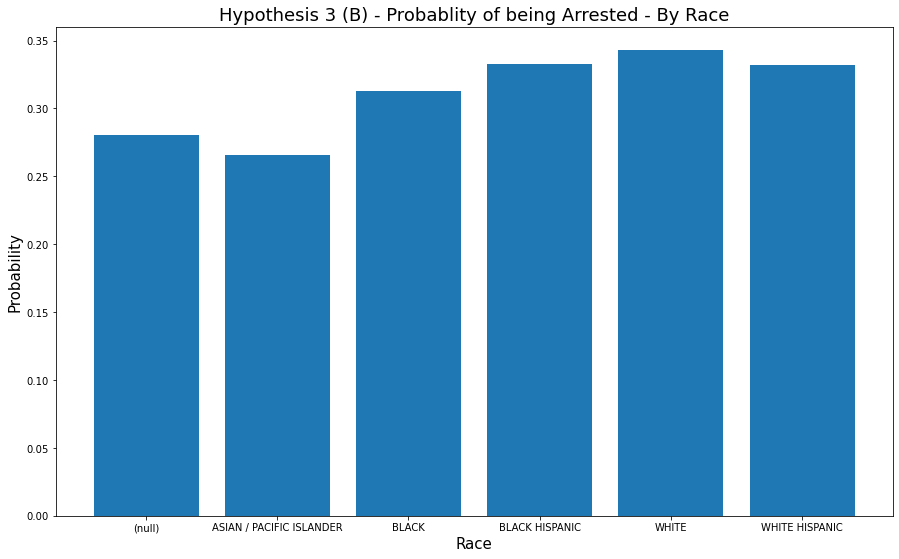

In [56]:
# Visualzing the dataframe above to allow the analysis to become more intuitive

fig, ax = plt.subplots(1,1, figsize = (15,9))

x = sqf_arrested['SUSPECT_RACE_DESCRIPTION']
y = sqf_arrested['PROB_ARRESTED']

ax.bar(x, y)
ax.set_title('Hypothesis 3 (B) - Probablity of being Arrested - By Race', fontsize = 18)
plt.xlabel('Race', fontsize = 15)
plt.ylabel('Probability', fontsize = 15)
plt.show()

# Hypothesis 4

## Complaint for a commited crime is reported in the same week/ month of its occurence

In [57]:
# Reading the complaint data

complaint = pd.read_csv('NYPD_Complaint_Data_Historic_2019.csv')

In [58]:
# Preliminary analysis for complaint data

preliminary_analysis(complaint)

*** Rows and Columns in the Dataframe ***
Number of Instances (rows) : 450976
Number of Columns :  35
*** Column Names, Non-Null Count and Column Data Types***
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450976 entries, 0 to 450975
Data columns (total 35 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CMPLNT_NUM         450976 non-null  int64  
 1   CMPLNT_FR_DT       450976 non-null  object 
 2   CMPLNT_FR_TM       450976 non-null  object 
 3   CMPLNT_TO_DT       394679 non-null  object 
 4   CMPLNT_TO_TM       394912 non-null  object 
 5   ADDR_PCT_CD        450976 non-null  int64  
 6   RPT_DT             450976 non-null  object 
 7   KY_CD              450976 non-null  int64  
 8   OFNS_DESC          450968 non-null  object 
 9   PD_CD              450684 non-null  float64
 10  PD_DESC            450684 non-null  object 
 11  CRM_ATPT_CPTD_CD   450976 non-null  object 
 12  LAW_CAT_CD         450976 non-null  ob

In [59]:
# Creating a copy of the data

comp = complaint.copy()

In [60]:
# Changing the date columns into datetime object

comp['CMPLNT_FR_DT'] =  pd.to_datetime(comp['CMPLNT_FR_DT'], format='%m/%d/%Y')
comp['CMPLNT_TO_DT'] =  pd.to_datetime(comp['CMPLNT_TO_DT'], format='%m/%d/%Y')
comp['RPT_DT'] =  pd.to_datetime(comp['RPT_DT'], format='%m/%d/%Y')

comp.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,894386865,2019-01-01,10:00:00,2019-12-27,09:06:00,70,2019-12-27,351,CRIMINAL MISCHIEF & RELATED OF,258.0,...,U,NaN,40.620410,-73.960486,"(40.620410148000076, -73.96048582799995)",PATROL BORO BKLYN SOUTH,NaN,UNKNOWN,UNKNOWN,E
1,921926672,2019-01-01,00:01:00,2019-09-11,23:59:00,110,2019-12-31,109,GRAND LARCENY,424.0,...,U,NaN,40.733927,-73.871582,"(40.73392684100003, -73.87158239799999)",PATROL BORO QUEENS NORTH,NaN,45-64,BLACK HISPANIC,M
2,548795490,2019-01-01,10:00:00,2019-12-27,10:00:00,70,2019-12-27,351,CRIMINAL MISCHIEF & RELATED OF,258.0,...,U,NaN,40.628220,-73.962913,"(40.62821988800005, -73.96291294199995)",PATROL BORO BKLYN SOUTH,NaN,UNKNOWN,UNKNOWN,E
3,287029243,2019-01-01,10:00:00,2019-12-27,08:40:00,70,2019-12-27,351,CRIMINAL MISCHIEF & RELATED OF,258.0,...,U,NaN,40.654215,-73.959576,"(40.65421463600006, -73.95957562499996)",PATROL BORO BKLYN SOUTH,NaN,UNKNOWN,UNKNOWN,D
4,139970812,2019-01-01,01:01:00,NaT,NaN,105,2019-11-03,351,CRIMINAL MISCHIEF & RELATED OF,258.0,...,NaN,NaN,40.666411,-73.740103,"(40.666411423000056, -73.74010315599998)",PATROL BORO QUEENS SOUTH,NaN,UNKNOWN,UNKNOWN,E


In [61]:
# Selecting the required columns

comp_req = comp[['CMPLNT_NUM', 'CMPLNT_FR_DT', 'RPT_DT']]

In [62]:
# Selecting only the required columns from the complaint dataset for this hypothesis    

comp_req = select_columns(comp, 'CMPLNT_NUM', 'CMPLNT_FR_DT', 'RPT_DT')
comp_req

,CMPLNT_NUM,CMPLNT_FR_DT,RPT_DT
0,894386865,2019-01-01,2019-12-27
1,921926672,2019-01-01,2019-12-31
2,548795490,2019-01-01,2019-12-27
3,287029243,2019-01-01,2019-12-27
4,139970812,2019-01-01,2019-11-03
...,...,...,...
450971,947831880,2019-12-31,2019-12-31
450972,167545117,2019-12-31,2019-12-31
450973,501183351,2019-12-31,2019-12-31
450974,142572357,2019-12-31,2019-12-31


In [63]:
# Calculating the difference between the date of crime occurence and date when the event was reported to the police

# Days
comp_req['DIFF_DAYS'] = comp_req['RPT_DT'] - comp_req['CMPLNT_FR_DT']

# Weeks
comp_req['DIFF_WEEKS'] = round(comp_req['DIFF_DAYS']/np.timedelta64(1,'W'))

# Months
comp_req['DIFF_MONTHS'] = round(comp_req['DIFF_DAYS']/np.timedelta64(1,'M'))

In [64]:
# Changing the data type of some columns

comp_req.DIFF_WEEKS = comp_req.DIFF_WEEKS.astype(int)
comp_req.DIFF_MONTHS = comp_req.DIFF_MONTHS.astype(int)

comp_req.head()

,CMPLNT_NUM,CMPLNT_FR_DT,RPT_DT,DIFF_DAYS,DIFF_WEEKS,DIFF_MONTHS
0,894386865,2019-01-01,2019-12-27,360 days,51,12
1,921926672,2019-01-01,2019-12-31,364 days,52,12
2,548795490,2019-01-01,2019-12-27,360 days,51,12
3,287029243,2019-01-01,2019-12-27,360 days,51,12
4,139970812,2019-01-01,2019-11-03,306 days,44,10


In [65]:
# Identifying distribution of number of crimes reported weeks after the crime occured

comp_req.DIFF_WEEKS.value_counts()

0     395290
1      25608
2       8573
3       4891
4       3566
5       2250
6       1624
7       1209
8       1030
9        888
10       697
11       635
13       549
12       539
14       424
15       324
16       272
17       257
18       196
19       179
22       175
24       172
23       163
20       155
21       144
26       109
25        97
28        83
27        79
29        79
32        77
30        68
31        64
39        60
38        41
42        41
35        41
36        38
37        38
33        38
34        36
43        32
44        31
40        28
45        19
41        19
51        13
48        11
49        10
46         8
50         3
47         2
52         1
Name: DIFF_WEEKS, dtype: int64

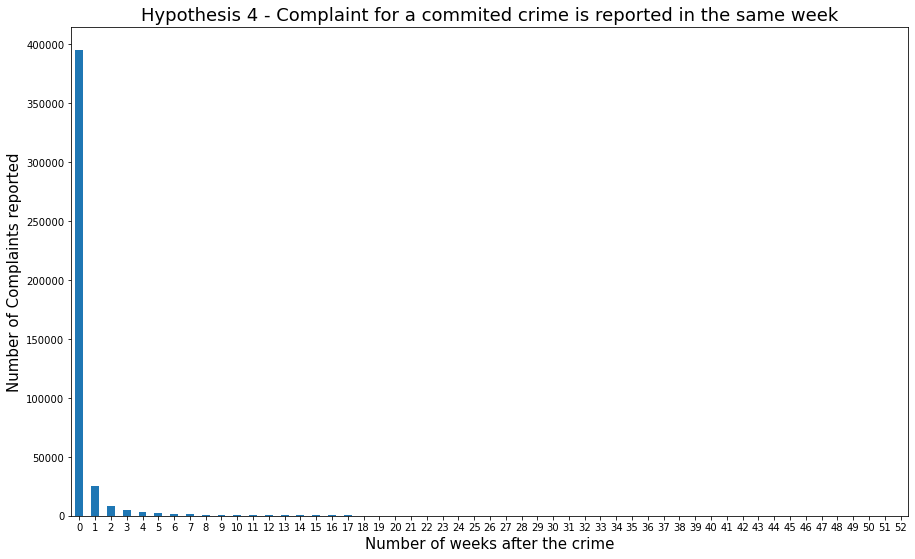

In [66]:
# Plotting the number of crimes reported vs weeks after the crime occured

fig, ax = plt.subplots(1,1, figsize = (15,9))

comp_req['DIFF_WEEKS'].value_counts().sort_index(ascending=True).plot(kind='bar', rot=0)

ax.set_title('Hypothesis 4 - Complaint for a commited crime is reported in the same week', fontsize = 18)
plt.xlabel('Number of weeks after the crime', fontsize = 15)
plt.ylabel('Number of Complaints reported', fontsize = 15)
plt.show()

In [67]:
# Identifying distribution of number of crimes reported months after the crime occured

comp_req.DIFF_MONTHS.value_counts()

0     427670
1      14132
2       4100
3       2105
4        994
5        711
6        444
7        313
8        168
9        167
10       125
11        30
12        17
Name: DIFF_MONTHS, dtype: int64

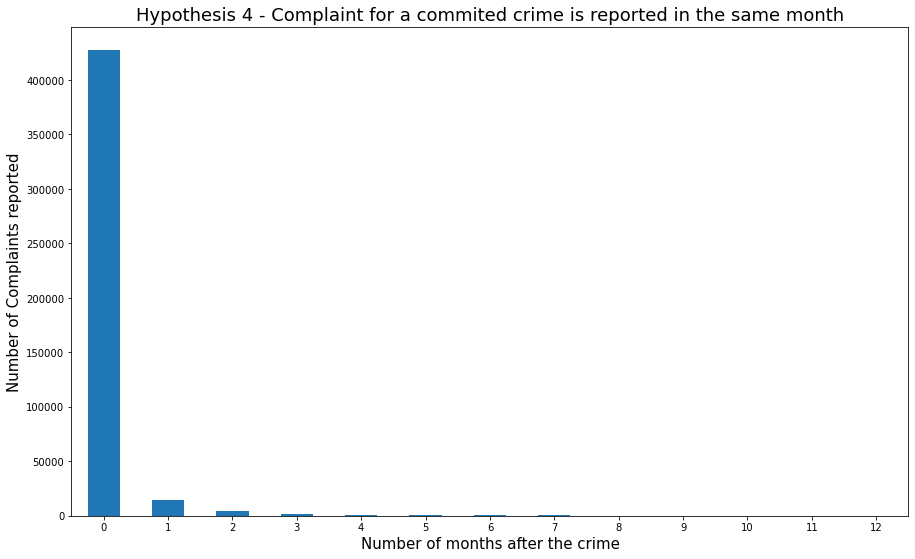

In [68]:
# Plotting the number of crimes reported vs months after the crime occured

fig, ax = plt.subplots(1,1, figsize = (15,9))

comp_req['DIFF_MONTHS'].value_counts().sort_index(ascending=True).plot(kind='bar', rot=0)

ax.set_title('Hypothesis 4 - Complaint for a commited crime is reported in the same month', fontsize = 18)
plt.xlabel('Number of months after the crime', fontsize = 15)
plt.ylabel('Number of Complaints reported', fontsize = 15)
plt.show()